1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

In order to make businesses better, data must be extracted analyzied and used properly. But in order to do this, we must go through the data hierarchy of needs which highlights the process for using data to better the future of a company. First, we must collect the data, store the data collected and then prepare it by cleaning it up. This gets the data ready for analysis after which a dashbaord can be created to show the results. But this isn't enough to get desired outputs. After analysis is done on the data, we can use it to gain causal insights which cannot be done by simply looking at the data. For example we cannot know what is causing member to cancel their netflix subscription by just looking at the data or even the data analyis. This is where prototype and testing ML comes in. The ML models help with providing insights into the reasons/causes of the desired ouptut we want for the company(retaining netflix members). Lastly, ML in production is generalizing the model and applying it to a website or app.   

The first 4 steps need to be executed correctly before proceeding to using machine learning. If the steps are not followed in order, then we won't get the results we are looking for. Hence the saying "garbage in garbage out." For example, if we prepared the data but the data was too messy, then machine learning would be applied incorrectly because you'd be using faulty or inconsise data for investigating the target variable.  So the prior steps need to be done properly before machine learning. Without that, we can't know how to apply machine learning.

Even after deploying machine learning models into production systems, it is important to monitor progress regularly. It should be released gradully and to only a small group of audience (to sustain the possible risk). Following these steps can ensure that you catch early issues in the model and can withdraw it from the sustem if neccessary.

2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modules for statistics
import math
import statistics
from scipy import stats


loans_df = pd.read_csv("loans_full_schema.csv") 
loans_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [10]:
print(loans_df.describe())

        emp_length  annual_income  debt_to_income  annual_income_joint  \
count  9183.000000   1.000000e+04     9976.000000         1.495000e+03   
mean      5.930306   7.922215e+04       19.308192         1.279146e+05   
std       3.703734   6.473429e+04       15.004851         7.016838e+04   
min       0.000000   0.000000e+00        0.000000         1.920000e+04   
25%       2.000000   4.500000e+04       11.057500         8.683350e+04   
50%       6.000000   6.500000e+04       17.570000         1.130000e+05   
75%      10.000000   9.500000e+04       25.002500         1.515455e+05   
max      10.000000   2.300000e+06      469.090000         1.100000e+06   

       debt_to_income_joint    delinq_2y  months_since_last_delinq  \
count           1495.000000  10000.00000               4342.000000   
mean              19.979304      0.21600                 36.760709   
std                8.054781      0.68366                 21.634939   
min                0.320000      0.00000             

# Check datatypes to see if there are any that need to be changed.

In [3]:
print(loans_df.dtypes)

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

# Check for duplicate rows-NONE!

In [25]:


loans_df[loans_df.duplicated()]

loans_df[loans_df.duplicated(keep='last')]

loans_df[loans_df.duplicated(keep=False)]


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees


# Check for duplicate columns

In [39]:
#Duplicate columns:
loans_df.T[loans_df.T.duplicated(keep=False)].T

#only 1 value out of the 10,000 where the number of accounts (where applicant is currently delinguent) is 1. 
loans_df["current_accounts_delinq"].value_counts() 

#loans_df[loans_df["current_accounts_delinq"] == 1]

#num_accounts_30d_past_due: Number of current accounts that are 30 days past due. (just 1 out of 10,000)
loans_df["num_accounts_30d_past_due"].value_counts() 

0    9999
1       1
Name: num_accounts_30d_past_due, dtype: int64

In [259]:
#Remove duplicate column 
New_DF =loans_df.drop(["num_accounts_30d_past_due", "current_accounts_delinq"], axis=1)

# Removing NaNs

In [85]:
#checking further...
C = loans_df.columns.tolist()
for C in loans_df:
    print(loans_df[C].value_counts(dropna=False))
#Observations:
    
    #SMALL AMOUNT OF NaNs
        #emp_title: 833 NaNs
        
        #debt_to_income: 24 NaNs
        #months_since_last_credit_inquiry: 1271 NaNs
        #num_accounts_120d_past_due: 318 NaNs
    
    #LARGE AMOUNT OF NaNs (THESE COLUMNS WILL BE DELETED)
        #annual_income_joint: 8505 NaNs (column delete?)
        #verification_income_joint 8545 NaNs
        #debt_to_income_joint: 8505 NaNs
        #months_since_90d_late: 7715 NaNs
    
    #MEDIAM AMOUNT OF NaNs
        #months_since_last_delinq: 5658 NaNs
    

NaN                         833
manager                     218
owner                       204
teacher                     201
driver                      123
                           ... 
corporate tax director        1
captain-fire department       1
intervention specialist       1
coffee roaster                1
toolmaker                     1
Name: emp_title, Length: 4742, dtype: int64
10.0    3332
2.0      967
3.0      862
NaN      817
0.0      690
1.0      685
5.0      645
4.0      611
6.0      404
7.0      368
9.0      312
8.0      307
Name: emp_length, dtype: int64
CA    1330
TX     806
NY     793
FL     732
IL     382
NJ     338
OH     338
GA     334
NC     299
PA     298
VA     261
AZ     255
MD     247
MI     245
MA     237
CO     235
WA     235
CT     181
IN     178
TN     167
MN     159
MO     159
NV     158
SC     145
OR     130
WI     128
AL     122
KY      97
LA      96
KS      89
OK      81
MS      72
AR      70
WV      68
UT      61
NE      56
RI      53
NH      47

In [260]:
#Remove rows where majority are NaNs

New_DF2 = New_DF.drop(['annual_income_joint', 'verification_income_joint', 
         'debt_to_income_joint','months_since_90d_late'], axis = 1)

# Checking again for duplicates...

In [103]:
New_DF2.duplicated().value_counts()

False    10000
dtype: int64

In [261]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Checking to see if there is a proportional relationship between any of the columns because in machine learning this implies duplication. 

In [106]:
mm = preprocessing.MinMaxScaler()
df_float = New_DF2.loc[:, New_DF2.dtypes == 'float64']
df_scaled = pd.DataFrame(mm.fit_transform(df_float), index=df_float.index, columns=df_float.columns)
duplicates = df_scaled.T[df_scaled.T.duplicated()]
duplicates.T

""
0
1
2
3
4
...
9995
9996
9997
9998


# Replacing NaNs

In [262]:
#the NaNs in debt_to_income column are best filled with the mean (according to the value_counts() done above) 
New_DF2['debt_to_income'] = New_DF2['debt_to_income'].fillna(New_DF2['debt_to_income'].mean())

#the NaNs in months_since_last_credit_inquiry column are best filled with the mean 
#(according to the value_counts() done above) 
New_DF2['months_since_last_credit_inquiry'] = New_DF2['months_since_last_credit_inquiry'].fillna(New_DF2['months_since_last_credit_inquiry'].mean())

#the 318 NaNs in the num_accounts_120d_past_due column are best filled using the mode since majority of 
#numbers are zero (9682 zeros)
New_DF2['num_accounts_120d_past_due'] = New_DF2['num_accounts_120d_past_due'].fillna(New_DF2['num_accounts_120d_past_due'].mode()[0])

#the NaNs in months_since_last_delinq column are best filled with the mean 
#(according to the value_counts() done above) 
New_DF2['months_since_last_delinq'] = New_DF2['months_since_last_delinq'].fillna(New_DF2['months_since_last_delinq'].mean())

#the NaNs in emp_length column are best filled with the mean (according to the value_counts() done above) 
New_DF2['emp_length'] = New_DF2['emp_length'].fillna(New_DF2['emp_length'].mean())

#FOLLOWING DOESNT WORK:
    #New_DF['num_accounts_120d_past_due'].replace(np.nan, 0)

In [228]:
#Checking to see if NaNs have been removed

print(New_DF2['debt_to_income'].value_counts(dropna=False))

print(New_DF2['months_since_last_credit_inquiry'].value_counts(dropna=False))

print(New_DF2['num_accounts_120d_past_due'].value_counts(dropna=False))

print(New_DF2['months_since_last_delinq'].value_counts(dropna=False))

print(New_DF2['emp_length'].value_counts(dropna=False))

0.000000     28
19.308192    24
16.110000    14
13.200000    12
19.420000    12
             ..
23.900000     1
0.320000      1
8.820000      1
35.220000     1
45.260000     1
Name: debt_to_income, Length: 3674, dtype: int64
7.340703     1271
1.000000      796
2.000000      740
0.000000      693
3.000000      663
4.000000      651
5.000000      576
6.000000      554
7.000000      510
8.000000      473
9.000000      385
10.000000     375
11.000000     279
13.000000     268
12.000000     247
14.000000     226
15.000000     215
16.000000     183
18.000000     172
17.000000     166
19.000000     131
21.000000     108
20.000000     106
22.000000     103
23.000000      76
24.000000      33
Name: months_since_last_credit_inquiry, dtype: int64
0.0    10000
Name: num_accounts_120d_past_due, dtype: int64
36.760709     5658
25.000000       87
9.000000        86
24.000000       85
12.000000       83
              ... 
109.000000       1
88.000000        1
99.000000        1
106.000000       1
98.0

In [229]:
#Final NaNs check:
print(New_DF2.isnull().sum())

emp_title                           833
emp_length                            0
state                                 0
homeownership                         0
annual_income                         0
verified_income                       0
debt_to_income                        0
delinq_2y                             0
months_since_last_delinq              0
earliest_credit_line                  0
inquiries_last_12m                    0
total_credit_lines                    0
open_credit_lines                     0
total_credit_limit                    0
total_credit_utilized                 0
num_collections_last_12m              0
num_historical_failed_to_pay          0
total_collection_amount_ever          0
current_installment_accounts          0
accounts_opened_24m                   0
months_since_last_credit_inquiry      0
num_satisfactory_accounts             0
num_accounts_120d_past_due            0
num_active_debit_accounts             0
total_debit_limit                     0


In [263]:
New_DF2['emp_title'] = New_DF2['emp_title'].replace(np.nan, 'Unknown')

#NaNs check again:
print(New_DF2.isnull().sum())

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc_accounts               0
num_open_cc_

In [264]:
New_DF2

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.000000,2001,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,36.760709,1996,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.000000,2006,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,36.760709,2007,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,36.760709,2008,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,36.760709,2008,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.000000,1994,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,6.000000,2004,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,36.760709,1999,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

In [130]:
#Extract numerical columns
Numerical_DF = New_DF2.select_dtypes(include=['float64', 'int64'])

#Numerical_DF.columns

Numerical_DF

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,90000.0,18.01,0,38.000000,2001,6,28,10,70795,...,0,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,40000.0,5.04,0,36.760709,1996,1,30,14,28800,...,1,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0
2,3.0,40000.0,21.15,0,28.000000,2006,4,31,10,24193,...,0,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0
3,1.0,30000.0,10.16,0,36.760709,2007,0,4,4,25400,...,0,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,35000.0,57.96,0,36.760709,2008,7,22,16,69839,...,0,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,0,36.760709,2008,5,44,13,199195,...,1,24000,36,7.35,744.90,21586.34,2969.80,2413.66,556.14,0.0
9996,8.0,121000.0,32.38,4,9.000000,1994,1,28,15,382061,...,0,10000,36,19.03,366.72,9147.44,1456.31,852.56,603.75,0.0
9997,10.0,67000.0,45.26,2,6.000000,2004,0,18,11,346402,...,0,30000,36,23.88,1175.10,27617.65,4620.80,2382.35,2238.45,0.0
9998,1.0,80000.0,11.99,0,36.760709,1999,1,38,15,294475,...,0,24000,36,5.32,722.76,21518.12,2873.31,2481.88,391.43,0.0


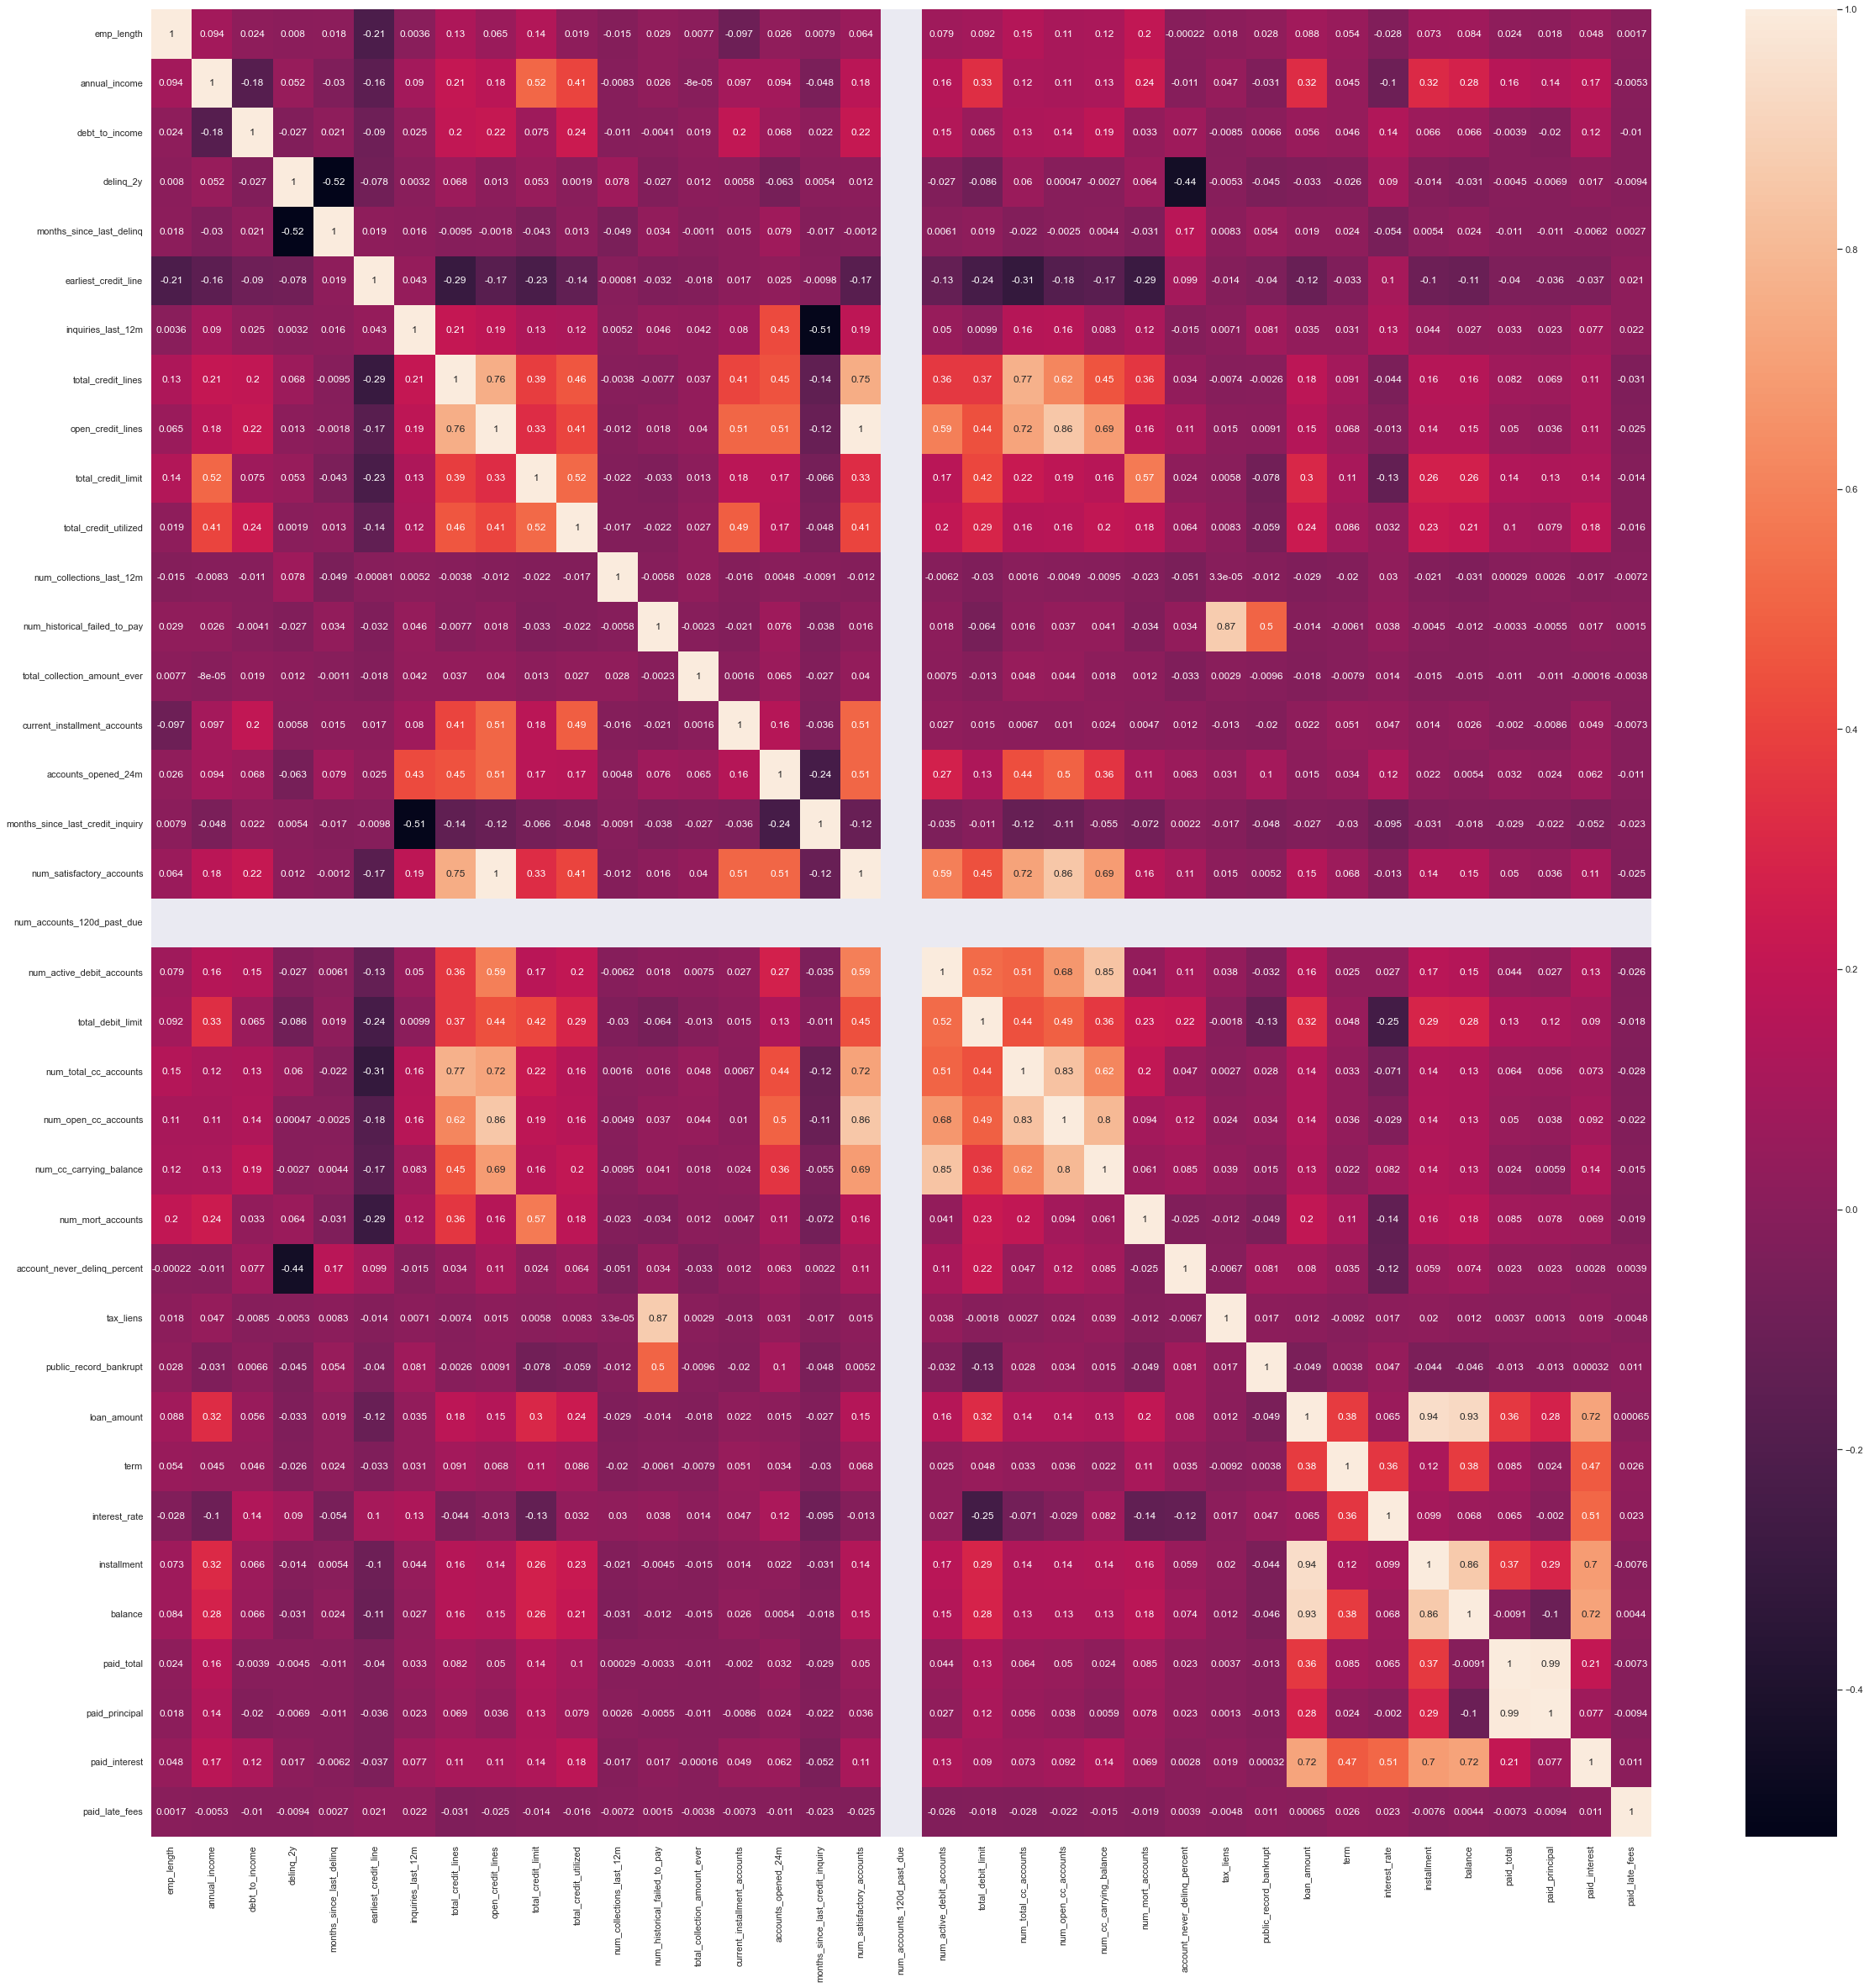

In [135]:
corrMatrix = Numerical_DF.corr()

sns.set(rc = {'figure.figsize':(40,40)})

dataplot = sns.heatmap(corrMatrix, cmap="rocket", annot=True)

#YlGnBu

The diagram above shows the correlation matrix for all the numerical columns in our dataframe. The correlation coefficient is the measure of the linear relationship between 2 variables. But if we want to know the correlation between more than just a pair of variables, we can use the correlation matrix seen above. 

As you can see, most of the correlation between the variables is negligent since it is close to zero. The "weakly correlated" (not much correlation) variables are highlighted in the dark purple color. 


The diagonal of the matrix is 1 since that is the measure of how correlated each variable is to itself.

Some noticable relationships are:

- The correlation is slightly neagtive between month_since_last_delinq and delinq_2y because as the months increase since last delinquency, the number of delinquencies on lines of credit decreases. 

- If the total credit balance is increased, the total available credit will also increase.

- The more  open credit lines there are, the more credit lines are in a person's credit history. 

- If someone has alot of satisfactory accounts, then they may also have an increase in active debit or credit card accounts as well as increase in open credit card accounts.

- The monthly payment will be more if the loan amount is more. And the more credit cards carrying a balance the higher the loan amount tends to be. 

4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 




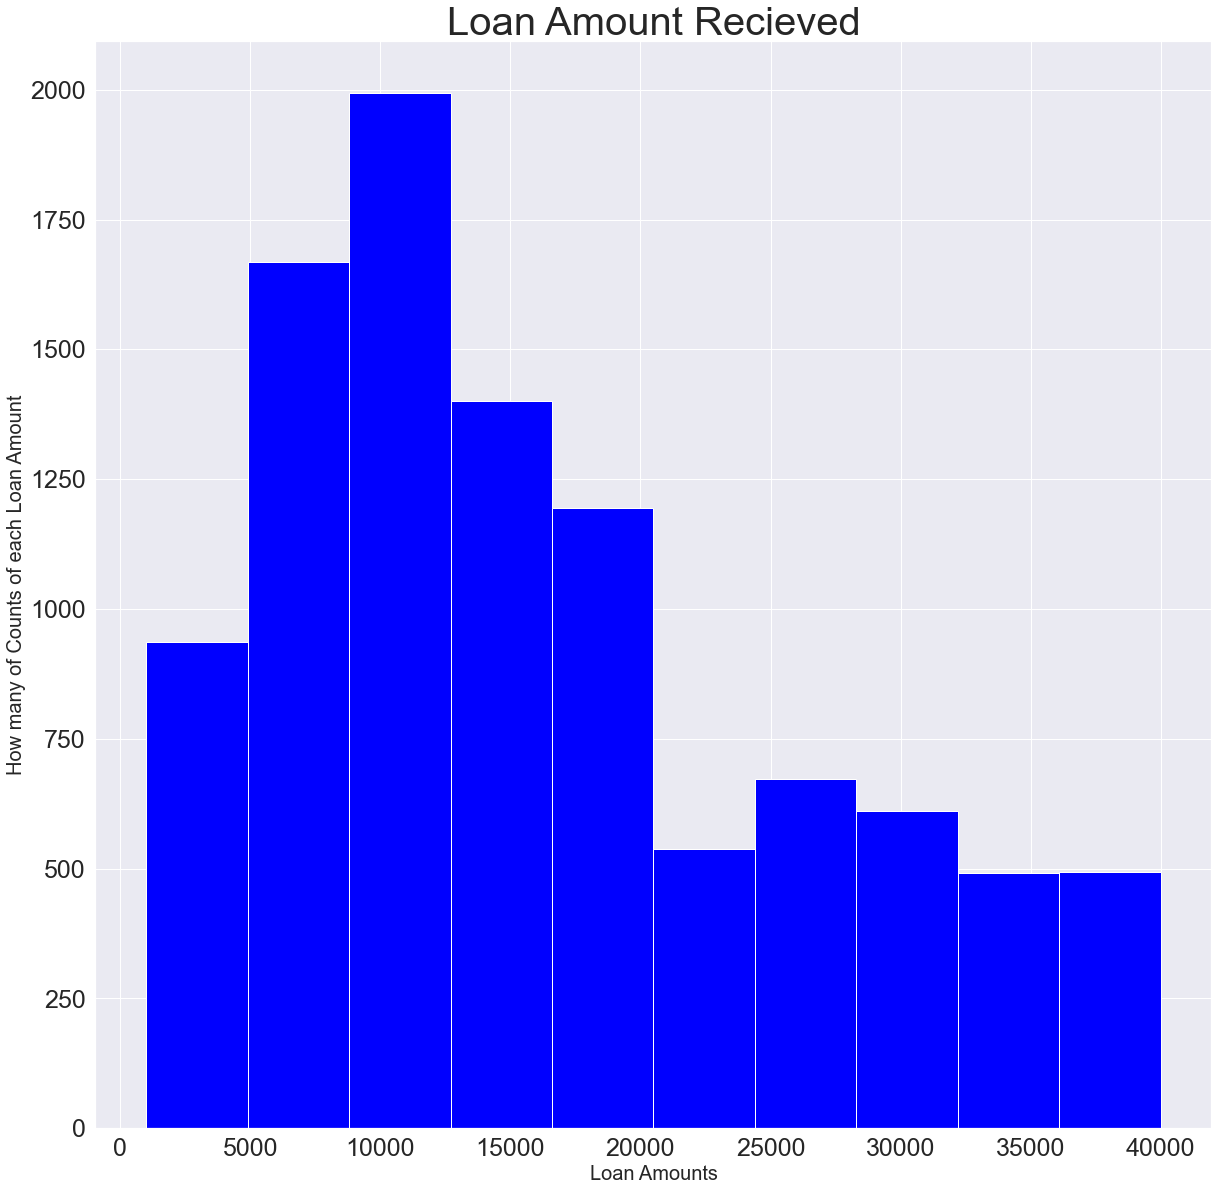

In [137]:
#loan_amount: The amount of the loan the applicant received.


#bins = 53, 

New_DF2['loan_amount'].hist (color="blue", figsize=(20,20))

plt.title('Loan Amount Recieved', fontsize = 40)
plt.xlabel('Loan Amounts', fontsize = 20)
plt.ylabel('How many of Counts of each Loan Amount', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=25)


#Show plot
plt.show()

There is a postive correlation between the loan amounts and the number of each loan amount. The lenders give big loans to people more than they give small loans.

5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

In [265]:
New_DF2

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.000000,2001,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,36.760709,1996,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.000000,2006,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,36.760709,2007,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,36.760709,2008,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,36.760709,2008,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.000000,1994,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,6.000000,2004,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,36.760709,1999,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [285]:
Plains = ['MT', 'SD', 'WY', 'CO', 'OK', 'TX', 'NM']
Midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'WI']
Northeast = ['CT', 'ME', 'MA', 'NH', 'NY', 'PA', 'RI', 'VT', 'NJ']
South = ['AZ', 'AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV', 'DC']
Pacific = ['AK', 'CA', 'HI', 'OR', 'WA', 'UT', 'NV', 'ID']        

#The 'map' function: takes in function & various sizes of inputs(list, column, dataframe):
    #input function is called with the use of 'lambda'.
    #input function is the nested if/else statements that follow the colon
    #the map function allows us to iterate over the 'states' column


#The argument is 'i' is called on multiple times in the function that follows.  
#The value 'Plains' is returned (in the new column, region) if the statement that follows is true 
#else the next if statement is evaluated and so on. 
#There are a total of 4 nested if statemnets taken in by 'map'.

#NOTE TO SELF: [KEEP FOR FUTURE REFERENCE! (https://pythonexamples.org/python-lambda-if-else/)]

New_DF2['Region'] = list(map(lambda i: 'Plains' if i in Plains else ('Midwest' if i in Midwest else ('Northeast' if i in Northeast else ('South' if i in South else 'Pacific'))), New_DF2['state']))

New_DF2

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.000000,2001,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,36.760709,1996,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.000000,2006,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,36.760709,2007,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,36.760709,2008,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,36.760709,2008,...,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,Plains
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.000000,1994,...,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,Northeast
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,6.000000,2004,...,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,Northeast
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,36.760709,1999,...,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,Midwest


In [276]:
New_DF2['Region'].value_counts()

South        3008
Pacific      2020
Northeast    1996
Midwest      1748
Plains       1228
Name: Region, dtype: int64

a.	Is there a better way to do this than with a lambda? 

In [286]:
Plains = ['MT', 'SD', 'WY', 'CO', 'OK', 'TX', 'NM']
Midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'WI']
Northeast = ['CT', 'ME', 'MA', 'NH', 'NY', 'PA', 'RI', 'VT', 'NJ']
South = ['AZ', 'AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV', 'DC']
Pacific = ['AK', 'CA', 'HI', 'OR', 'WA', 'UT', 'NV', 'ID']        


#numpy.where(condition[, x, y])
    #The numpy 'where' function outputs an array (in this case a new column) which contains the 
    #elements specified in the parameter (x) ONLY if both x & y are specified and 
    #the condition is true (EX: New_DF2['state'].isin(Plains)).  
    #In this case, the x is each region and the y is np.nan. 
  

New_DF2['Region'] = np.where(New_DF2['state'].isin(Plains), 'Plains',
                       np.where(New_DF2['state'].isin(Midwest), 'Midwest', 
                          np.where(New_DF2['state'].isin(Northeast), 'Northeast', 
                             np.where(New_DF2['state'].isin(South),'South',
                                np.where(New_DF2['state'].isin(Pacific),'Pacific', np.nan)))))


New_DF2.head(20)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Region
0,global config engineer,3.000000,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.000000,2001,...,Mar-2018,Current,whole,Cash,27015.86,1999.330000,984.14,1015.19,0.0,Northeast
1,warehouse office clerk,10.000000,HI,RENT,40000.0,Not Verified,5.04,0,36.760709,1996,...,Feb-2018,Current,whole,Cash,4651.37,499.120000,348.63,150.49,0.0,Pacific
2,assembly,3.000000,WI,RENT,40000.0,Source Verified,21.15,0,28.000000,2006,...,Feb-2018,Current,fractional,Cash,1824.63,281.800000,175.37,106.43,0.0,Midwest
3,customer service,1.000000,PA,RENT,30000.0,Not Verified,10.16,0,36.760709,2007,...,Jan-2018,Current,whole,Cash,18853.26,3312.890000,2746.74,566.15,0.0,Northeast
4,security supervisor,10.000000,CA,RENT,35000.0,Verified,57.96,0,36.760709,2008,...,Mar-2018,Current,whole,Cash,21430.15,2324.650000,1569.85,754.80,0.0,Pacific
5,Unknown,5.930306,KY,OWN,34000.0,Not Verified,6.46,1,3.000000,1990,...,Jan-2018,Current,whole,Cash,4256.71,873.130000,743.29,129.84,0.0,South
6,hr,10.000000,MI,MORTGAGE,35000.0,Source Verified,23.66,0,36.760709,2004,...,Jan-2018,Current,whole,Cash,22560.00,2730.510000,1440.00,1290.51,0.0,Midwest
7,police,10.000000,AZ,MORTGAGE,110000.0,Source Verified,16.19,1,19.000000,2005,...,Jan-2018,Current,whole,Cash,19005.39,1765.840000,994.61,771.23,0.0,South
8,parts,10.000000,NV,MORTGAGE,65000.0,Source Verified,36.48,1,18.000000,1998,...,Feb-2018,Current,whole,Cash,18156.66,2703.220000,1843.34,859.88,0.0,Pacific
9,4th person,3.000000,IL,RENT,30000.0,Not Verified,18.91,0,36.760709,2001,...,Mar-2018,Current,fractional,Cash,6077.13,391.150000,322.87,68.28,0.0,Midwest


In [287]:
New_DF2['Region'].value_counts()
#New_DF2['Region'].info()

South        3008
Pacific      2020
Northeast    1996
Midwest      1748
Plains       1228
Name: Region, dtype: int64

b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

# Technique #1 (w/o Lambda)

In [288]:
import time
from timer import timer

start = time.time()

Plains = ['MT', 'SD', 'WY', 'CO', 'OK', 'TX', 'NM']
Midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'WI']
Northeast = ['CT', 'ME', 'MA', 'NH', 'NY', 'PA', 'RI', 'VT', 'NJ']
South = ['AZ', 'AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV', 'DC']
Pacific = ['AK', 'CA', 'HI', 'OR', 'WA', 'UT', 'NV', 'ID']        


New_DF2['Region'] = np.where(New_DF2['state'].isin(Plains), 'Plains',
                       np.where(New_DF2['state'].isin(Midwest), 'Midwest', 
                          np.where(New_DF2['state'].isin(Northeast), 'Northeast', 
                             np.where(New_DF2['state'].isin(South),'South',
                                np.where(New_DF2['state'].isin(Pacific),'Pacific', np.nan)))))




end = time.time()

total = end-start
total

0.012436866760253906

# Technique #2 (w/ Lambda)

In [289]:
start2 = time.time()


Plains = ['MT', 'SD', 'WY', 'CO', 'OK', 'TX', 'NM']
Midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'WI']
Northeast = ['CT', 'ME', 'MA', 'NH', 'NY', 'PA', 'RI', 'VT', 'NJ']
South = ['AZ', 'AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV', 'DC']
Pacific = ['AK', 'CA', 'HI', 'OR', 'WA', 'UT', 'NV', 'ID']        


New_DF2['Region'] = list(map(lambda i: 'Plains' if i in Plains else ('Midwest' if i in Midwest else ('Northeast' if i in Northeast else ('South' if i in South else 'Pacific'))), New_DF2['state']))

end2 = time.time()

total2 = end2-start2
total2

0.01671600341796875

Based on the time both codes took, it seems like the where function is more performant since it took less time. 

6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

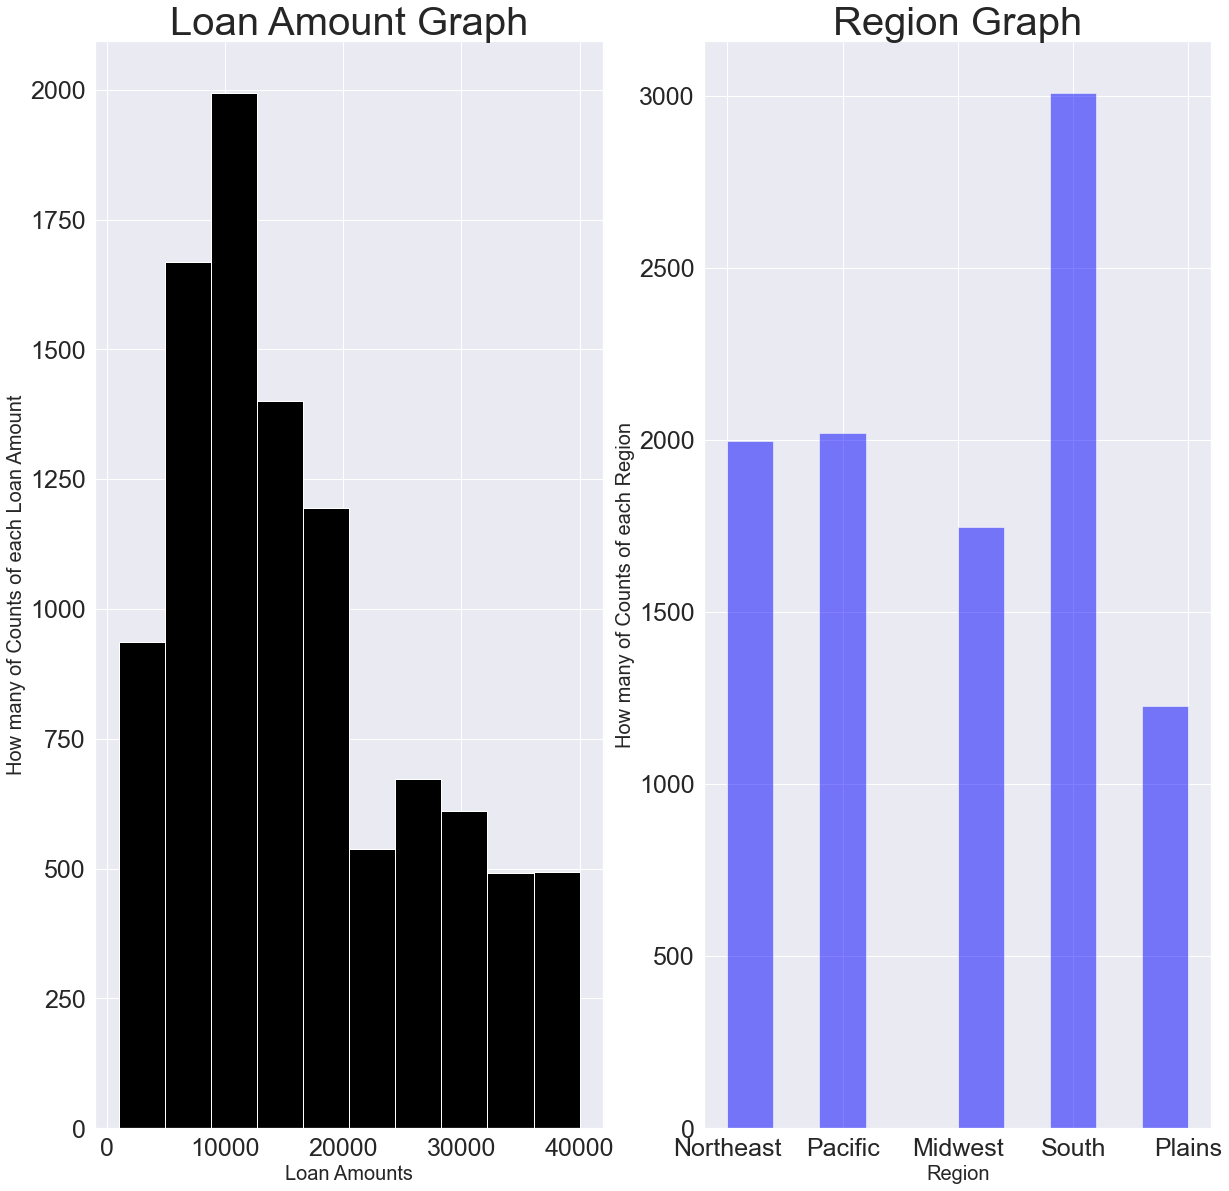

In [292]:
#Create histogram of reviews_per_month
plt.subplot(1, 2, 1)
New_DF2['loan_amount'].hist (color="black", figsize=(20,20))

plt.title('Loan Amount Graph', fontsize = 40)
plt.xlabel('Loan Amounts', fontsize = 20)
plt.ylabel('How many of Counts of each Loan Amount', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=25)

#Create histogram of number_of_reviews
plt.subplot(1, 2, 2)
New_DF2['Region'].hist (color="blue", alpha=0.5, figsize=(20,20))


plt.title('Region Graph', fontsize = 40)
plt.xlabel('Region', fontsize = 20)
plt.ylabel('How many of Counts of each Region', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=25)

#Show plot
plt.show()

Based on the histograms, loan amounts between 5000 and 15000 are given the most. This is reflected in the adjacent graph--those residing in the Southern region have the most counts which indiates that they recieve more loans than any other region. I would like to see how much the loan amount is based on region. 

7.	Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful. 

1) What made you decide to go into this feild?

2) What does your job entail?

3) How did you get pass the challenges? 

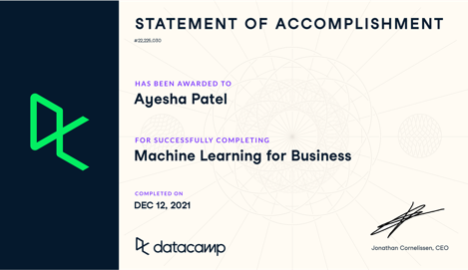




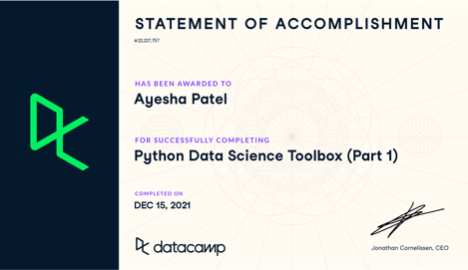